Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [ ]:
NAME = "MashrurSafirShabab"
ID = "20241037"
SECTION = "07"

---

# Part 1: Differentiation: Forward, Backward, And Central
---

## Task 1: Differentiation

We have already learnt about *forward differentiation*, *backward diferentiation* and *central differentiation*. In this part of the assignment we will write methods to calculate this values and check how they perform.

The equations are as follows,

\begin{align}
\text{forward differentiation}, f^\prime(x) \simeq \frac{f(x+h)-f(x)}{h} \tag{4.6} \\
\text{backward differentiation}, f^\prime(x) \simeq \frac{f(x)-f(x-h)}{h} \tag{4.7} \\
\text{central differentiation}, f^\prime(x) \simeq \frac{f(x+h)-f(x-h)}{2h} \tag{4.8}
\end{align}

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

Here, `forward_diff(f, h, x)`, `backward_diff(f, h, x)`, and `central_diff(f, h, x)` calculates the *forward differentiation*, *backward differentiation* and *central differentiation* respectively. finally the `error(f, f_prime, h, x)` method calculates the different values for various $h$ and returns the errors.

Later we will run some code to test out performance. The first one is done for you.

In [ ]:
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h

In [ ]:
def backward_diff(f, h, x):
    # --------------------------------------------
    # YOUR CODE HERE
    return (f(x) - f(x-h)) / h
    # --------------------------------------------

In [ ]:
def central_diff(f, h, x):
    # --------------------------------------------
    # YOUR CODE HERE
    return (f(x+h) - f(x-h)) / (2*h)
    # --------------------------------------------

In [ ]:
def error(f, f_prime, h, x):
    Y_correct = f_prime(x)
    f_error = np.array([])
    b_error = np.array([])
    c_error = np.array([])
    
    for h_i in h:
        # for different values of h (h_i)
        # calculate the error at the point x for  (i) forward method 
        #                                         (ii) backward method
        #                                         (ii) central method
        # the first one is done for you
        f_error_h_i = forward_diff(f, h_i, x) - Y_correct
        f_error = np.append(f_error, f_error_h_i)

        # --------------------------------------------
        # YOUR CODE HERE
        # --------------------------------------------
        b_error_h_i = backward_diff(f, h_i, x) - Y_correct
        b_error = np.append(b_error, b_error_h_i)

        c_error_h_i = central_diff(f, h_i, x) - Y_correct
        c_error = np.append(c_error, c_error_h_i)
    
    return f_error, b_error, c_error

## Plot1
Polynomial and Actual Derivative Function

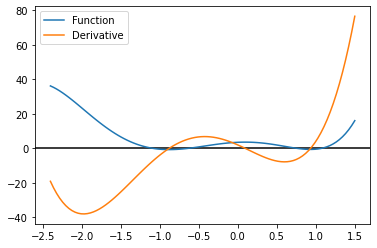

In [ ]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([3.5, 2.0, -10.0, -4.0, 6.0, 2.0])
data = p.linspace(domain=[-2.4, 1.5])
ax.plot(data[0], data[1], label='Function')

p_prime = p.deriv(1)
data2 = p_prime.linspace(domain=[-2.4, 1.5])
ax.plot(data2[0], data2[1], label='Derivative')

ax.legend()

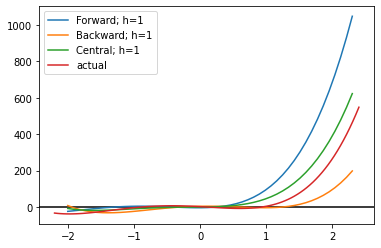

In [ ]:
h = 1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.0, 2.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=1')

data2 = p_prime.linspace(domain=[-2.2, 2.4])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()


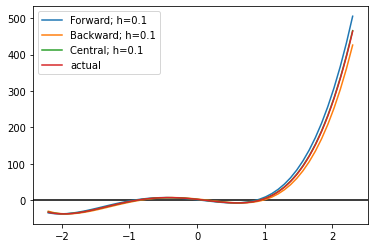

In [ ]:
h = 0.1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 2.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.1')

data2 = p_prime.linspace(domain=[-2.2, 2.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()


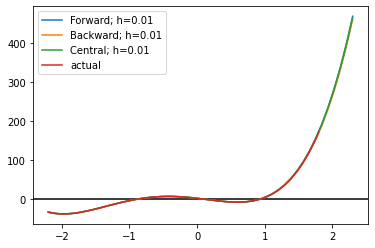

In [ ]:
h = 0.01
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 2.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.01')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.01')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.01')

data2 = p_prime.linspace(domain=[-2.2, 1.8])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()


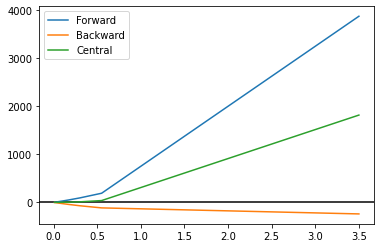

In [ ]:
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

h = np.array([3.5, 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
err = error(p, p_prime, h, 2.0)

bx.plot(h, err[0], label='Forward')
bx.plot(h, err[1], label='Backward')
bx.plot(h, err[2], label='Central')
bx.legend()


## Part 2: Richardson Extrapolation
---

## Instructions


Today's assignment is to:
1. Implement Richardson Extrapolation method using Python

## Richardson Extrapolation:
We used central difference method to calculate derivatives of functions last task. In this task we will use Richardson extrapolation to get a more accurate result.
Let,
$$ D_h = \frac{f(x_1+h) -f(x_1-h)}{2h}\tag{5.1}$$ 


General Taylor Series formula:
$$ f(x) = f(x_1) + f'(x_1)(x - x_1) + \frac{f''(x_1)}{2}(x - x_1)^2+... $$
Using Taylor's theorem to expand we get,

\begin{align}
f(x_1+h) &= f(x_1) + f^{\prime}(x_1)h + \frac{f^{\prime \prime}(x_1)}{2}h^2 + \frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + \frac{f^{(4)}(x_1)}{4!}h^4 + \frac{f^{(5)}(x_1)}{5!}h^5 + O(h^6)\tag{5.2} \\
f(x_1-h) &= f(x_1) - f^{\prime}(x_1)h + \frac{f^{\prime \prime}(x_1)}{2}h^2 - \frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + \frac{f^{(4)}(x_1)}{4!}h^4 - \frac{f^{(5)}(x_1)}{5!}h^5 + O(h^6)\tag{5.3}
\end{align}
Subtracting $5.3$ from $5.2$ we get,
$$ f(x_1+h) - f(x_1-h) = 2f^{\prime}(x_1)h + 2\frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + 2\frac{f^{(5)}(x_1)}{5!}h^5 + O(h^7)\tag{5.4}$$
So,
\begin{align}
D_h &= \frac{f(x_1+h) - f(x_1-h)}{2h} \\
&= \frac{1}{2h} \left( 2f^{\prime}(x_1)h + 2\frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + 2\frac{f^{(5)}(x_1)}{5!}h^5 + O(h^7) \right) \\
&= f^{\prime}(x_1) + \frac{f^{\prime \prime \prime}(x_1)}{6}h^2 + \frac{f^{(5)}(x_1)}{120}h^4 + O(h^6) \tag{5.5}
\end{align}
We get our derivative $f'(x)$ plus some error terms of order $>= 2$ Now, we want to bring our error order down to 4.

If we use $h, \text{and} \frac{h}{2}$ as step size in $5.5$, we get,
\begin{align}
D_h &= f^{\prime}(x_1) + f^{\prime \prime \prime}(x_1)\frac{h^2}{6} + f^{(5)}(x_1) \frac{h^4}{120} + O(h^6) \tag{5.6} \\
D_{h/2} &= f^{\prime}(x_1) + f^{\prime \prime \prime}(x_1)\frac{h^2}{2^2 . 6} + f^{(5)}(x_1) \frac{h^4}{2^4 . 120} + O(h^6) \tag{5.7}
\end{align}
Multiplying $5.7$ by $4$ and subtracting from $5.6$ we get,
\begin{align}
D_h - 4D_{h/2} &= -3f^{\prime}(x) + f^{(5)}(x_1) \frac{h^4}{160} + O(h^6)\\ 
\Longrightarrow D^{(1)}_h = \frac{4D_{h/2} - D_h}{3} &= f^{\prime}(x) - f^{(5)}(x_1) \frac{h^4}{480} + O(h^6) \tag{5.8}
\end{align}
Let's calculate the derivative using $5.8$

## 1. Let's create a function named `dh(f, h, x)`
function `dh(f, h, x)` takes three parameters as input: a function `f`, a value `h`, and a set of values `x`. It returns the derivatives of the function at each elements of array `x` using the Central Difference method. This calculates equation $(5.1)$.

In [ ]:
def dh(f, h, x):
    '''
    Input:
        f: np.polynomial.Polynonimial type data. 
        h: floating point data.
        x: np.array type data.
    Output:
        return np.array type data of slope at each point x.
    '''
    # --------------------------------------------
    # YOUR CODE HERE
    return (f(x+h) - f(x-h)) / (2*h) 
    # --------------------------------------------

## 2. Let's create another funtion `dh1(f, h, x)`.
`dh1(f, h, x)` takes the same type of values as `dh(f, h, x)` as input. It calculates the derivative using previously defined `dh(f, h, x)` function and using equation $5.8$ and returns the values.

In [ ]:
def dh1(f, h, x):
    '''
    Input:
        f: np.polynomial.Polynonimial type data. 
        h: floating point data.
        x: np.array type data.
    Output:
        return np.array type data of slope at each point x.
    '''
    # --------------------------------------------
    # YOUR CODE HERE
    return ((4*dh(f, h/2, x)) - dh(f, h, x)) / 3
    # --------------------------------------------

## 3. Now let's create the `error(f, hs, x_i)` function
The `error(f, hs, x_i)` function takes a function `f` as input. It also takes a list of different values of h as `hs` and a specific value as `x_i` as input. It calculates the derivatives as point `x_i` using both functions described in **B** and **C**, i.e. `dh` and `dh1`.

In [ ]:
def error(f, hs, x_i):  #Using the functions we wrote dh() my c_diff  and dh1() which is my first order c diff, we find the error through appending their diffrences with Y_actual ny f(x)
    '''
    Input:
        f  : np.polynomial.Polynonimial type data. 
        hs : np.array type data. list of h.
        x_i: floating point data. single value of x.
    Output:
        return two np.array type data of errors by two methods..
    '''
    f_prime = f.deriv(1)   #first order derivitive f^1(x)
    Y_actual = f_prime(x_i)  

    diff_error = []
    diff2_error = []

    for h in hs: #where h is my loop counter iterating through hs
        # for each values of hs calculate the error using both methods
        # and append those values into diff_error and diff2_error list.

        # --------------------------------------------
        # YOUR CODE HERE
        x = Y_actual-dh(f, h, x_i)
        y = Y_actual-dh1(f, h, x_i)
        diff_error.append(x)
        diff2_error.append(y)

        # --------------------------------------------
        
    print(pd.DataFrame({"h": hs, "Diff": diff_error, "Diff2": diff2_error}))

    return diff_error, diff2_error

## 4. Finally let's run some tests
function to draw the actual function.

### Draw the polynomial and it's actual derivative function

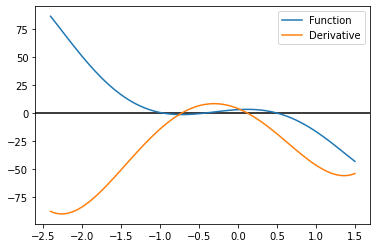

In [ ]:
def draw_graph(f, ax, domain=[-10, 10], label=None):
    data = f.linspace(domain=domain)
    ax.plot(data[0], data[1], label=label)

fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([3.0, 4.0, -14.0, -14.0, 3.0, 1.5])
p_prime = p.deriv(1)
draw_graph(p, ax, [-2.4, 1.5], 'Function')
draw_graph(p_prime, ax, [-2.4, 1.5], 'Derivative')

ax.legend()

### Draw the actual derivative and richardson derivative using `h=1` and `h=0.1` as step size.

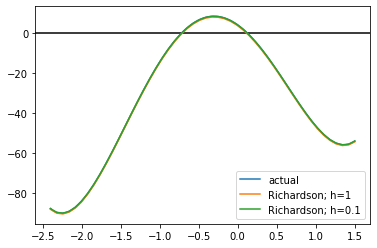

In [ ]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

draw_graph(p_prime, ax, [-2.4, 1.5], 'actual')

h = 1
x = np.linspace(-2.4, 1.5, 50, endpoint=True)
y = dh1(p, h, x)
ax.plot(x, y, label='Richardson; h=1')

h = 0.1
x = np.linspace(-2.4, 1.5, 50, endpoint=True)
y = dh1(p, h, x)
ax.plot(x, y, label='Richardson; h=0.1')

ax.legend()


### Draw error-vs-h cuve

       h         Diff         Diff2
0  3.500 -1082.593750  5.627344e+01
1  0.550   -21.312259  3.431484e-02
2  0.300    -6.312150  3.037500e-03
3  0.170    -2.024253  3.132038e-04
4  0.100    -0.700150  3.750000e-05
5  0.055    -0.211764  3.431485e-06
6  0.030    -0.063001  3.037501e-07
7  0.017    -0.020230  3.131795e-08
8  0.010    -0.007000  3.746014e-09


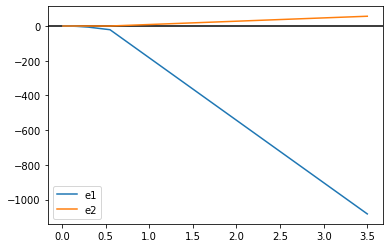

In [ ]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
hs = np.array([3.5, 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
e1, e2 = error(p, hs, 2.0)
ax.plot(hs, e1, label='e1')
ax.plot(hs, e2, label='e2')

ax.legend()
